# Black Friday Dataset EDA And Feature Engineering


## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Cleaning and preparing the data for model training

In [2]:
# Import training data
df_train=pd.read_csv('blackFriday_train.csv')
df_train.head(2)

<IPython.core.display.Javascript object>

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [3]:
#  Import the test data
df_test=pd.read_csv('blackFriday_test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
# Merge both train and test data
df=df_train.append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
## Droping the User_ID and Product_ID column
df.drop(['User_ID'],axis=1,inplace=True)
df.drop(['Product_ID'],axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
# Handling categorical feature Gender
# df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)
# df['Gender']=pd.get_dummies(df['Gender'],drop_first=1)

In [10]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
# df.head()

In [11]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [12]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [14]:
##second technqiue
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
 
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [15]:
df.head(2)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0


In [16]:
##fixing categorical City_categort
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [17]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [18]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,0,0,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,1,6,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [19]:
##drop City Category Feature
df.drop('City_Category',axis=1,inplace=True)

In [20]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,NaN,NaN,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0


In [21]:
## Missing Values
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [22]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [24]:
df['Product_Category_2'].mode()[0]

8.0

In [25]:
## Replace the missing values with mode
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [26]:
df['Product_Category_2'].isnull().sum()


0

In [27]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,NaN,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,0,10,2,0,12,8.0,NaN,1422.0,0,0
3,0,0,10,2,0,12,14.0,NaN,1057.0,0,0
4,1,6,16,4+,0,8,8.0,NaN,7969.0,0,1


In [28]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [29]:
df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

In [30]:
## Replace the missing values with mode
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [31]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0


In [32]:
df.shape

(783667, 11)

In [33]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [34]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

<ipython-input-34-7d6a3c4db74c>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')


In [35]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(1), uint8(2)
memory usage: 61.3+ MB


In [37]:
##convert object into integers
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  uint8  
 10  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), uint8(2)
memory usage: 58.3 MB


In [38]:
df['B']=df['B'].astype(int)
df['C']=df['C'].astype(int)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int32  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int32  
 10  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5)
memory usage: 62.8 MB


c:\users\ritesh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

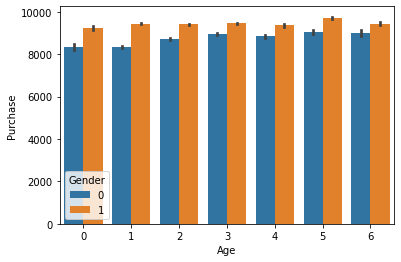

In [40]:
##Visualisation Age vs Purchased
sns.barplot('Age','Purchase',hue='Gender',data=df)

## Observation

Purchasing of men is high then women

c:\users\ritesh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

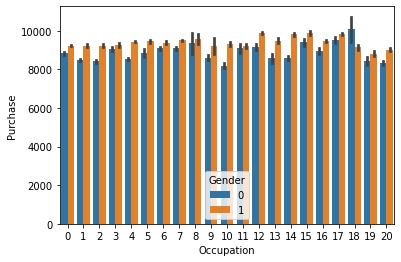

In [41]:
## Visualization of Purchase with occupation
sns.barplot('Occupation','Purchase',hue='Gender',data=df)

c:\users\ritesh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

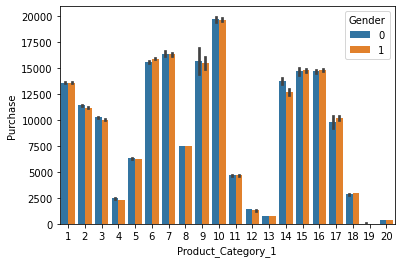

In [42]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=df)

c:\users\ritesh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

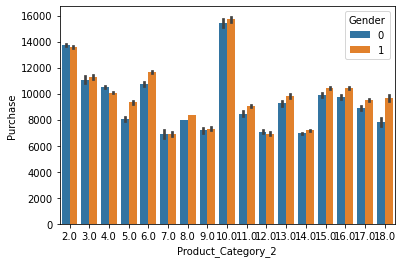

In [43]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=df)

c:\users\ritesh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

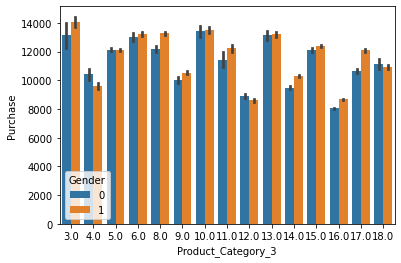

In [44]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=df)

In [45]:
df.head(2)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,0,10,2,0,1,6.0,14.0,15200.0,0,0


## Feature Scaling 


In [46]:
df_test=df[df['Purchase'].isnull()]

In [47]:
df_train=df[~df['Purchase'].isnull()]

In [48]:
X=df_train.drop('Purchase',axis=1)

In [49]:
X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,0,0,10,2,0,3,8.0,16.0,0,0
1,0,0,10,2,0,1,6.0,14.0,0,0
2,0,0,10,2,0,12,8.0,16.0,0,0
3,0,0,10,2,0,12,14.0,16.0,0,0
4,1,6,16,4,0,8,8.0,16.0,0,1


In [50]:
X.shape

(550068, 10)

In [51]:
Y=df_train['Purchase']

In [52]:
Y.shape

(550068,)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
     X, Y, test_size=0.33, random_state=35)

In [54]:

X_test.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
513628,0,1,16,2,1,8,16.0,16.0,1,0
393209,0,1,14,0,0,5,12.0,16.0,1,0
21519,1,2,5,0,0,1,6.0,8.0,1,0
523315,0,3,0,1,1,8,15.0,16.0,0,0
514606,1,1,20,0,0,5,8.0,16.0,1,0


In [55]:
## feature Scaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [56]:
# import pandas as pd
# import numpy as np

# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

## Model Selection

## Support Vector Machine(SVM)

In [57]:
classifier = svm.SVC(kernel='linear')

<IPython.core.display.Javascript object>

In [ ]:
classifier.fit(X_train, Y_train)

In [ ]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, Y_train)

In [ ]:
# X_train_prediction = rfc.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# predictions = rfc.predict(X_test)
# print("Accuracy_Score =", format(metrics.accuracy_score(Y_test, predictions)))

# Decision Tree

In [ ]:
# from sklearn.tree import DecisionTreeClassifier

# dtree = DecisionTreeClassifier()
# dtree.fit(X_train, Y_train)

In [ ]:
# X_train_prediction = dtree.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# predictions = dtree.predict(X_test)
# print("Accuracy Score =", format(metrics.accuracy_score(Y_test,predictions)))

## Xgboost Classifier

In [ ]:
# from xgboost import XGBClassifier

# xgb_model = XGBClassifier(gamma=0)
# xgb_model.fit(X_train, Y_train)

In [ ]:
# X_train_prediction = xgb_model.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# xgb_pred = xgb_model.predict(X_test)
# print("Accuracy Score =", format(metrics.accuracy_score(Y_test, xgb_pred)))

## K nearest neighbors Algorithm

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
# knn.fit(X_train, Y_train)

In [ ]:
# X_train_prediction = knn.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# knn_pred = knn.predict(X_test)
# print("Accuracy Score =", format(metrics.accuracy_score(Y_test, knn_pred)))

## Naive Bayes Algorithm

In [ ]:
# from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train, Y_train)

In [ ]:
# X_train_prediction = nb.predict(X_train)
# training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
# print('Accuracy score of the training data : ', training_data_accuracy)

In [ ]:
# nb_pred = nb.predict(X_test)
# print("Accuracy Score =", format(metrics.accuracy_score(Y_test, nb_pred)))